In [1]:
# @author: quantomas
# original code: The Python Quants


## Black-Scholes-Merton Option Pricing

# Libs
import numpy as np
np.set_printoptions(precision=5)

import math
from pylab import mpl, plt


# Monte Carlo Simulation der Geometrischen brownschen Bewegung

## Festlegen der Parameter - Bsp. 1

die üblichen Parameter: S0, r, T, sigma

In [2]:
np.set_printoptions(formatter= {'float_kind': lambda x: '%7.3f' % x})

S0 = 36.
r = 0.06
T = 1.0
sigma = 0.2


M = Anzahl der diskretisierten Zeitschritte<br>
I = Anzahl der simulierten Pfade

In [3]:
M = 100
I = 50000
dt = T / M
dt

0.01

Zufälliges Erzeugen einer (M+1) x I - Matrix mit Standard-Normalverteilung.<br>
Erste Dimension aus M+1 ist der Startwert des Prozesses, die anderen M Dimensionen die simulierten diskretisierten Zeitschritte

In [8]:
np.random.seed(100)

rn = np.random.standard_normal((M + 1, I))
print(rn.shape)
rn.round(2)


(101, 50000)


array([[ -1.750,   0.340,   1.150, ...,   0.950,  -0.140,  -0.400],
       [  0.860,  -0.140,  -0.160, ...,  -1.970,   0.540,   0.520],
       [  0.880,   0.930,  -0.270, ...,  -0.500,   0.710,  -0.300],
       ...,
       [  1.570,   0.130,  -1.110, ...,  -0.200,  -0.240,  -0.330],
       [  0.400,   0.840,  -0.750, ...,   1.030,   0.340,  -0.460],
       [  0.890,   0.510,   0.920, ...,   0.490,   0.530,   0.310]])

Die erste Zeile der Matrix $rn$ ist eine Dummy-Zeile und wird im späteren Verlauf nicht verwendet, vereinfacht aber den weiteren Code.<br>
Die Matrix $S$ wird mit der gleichen Dimension wie $rn$ initialisiert. Die erste Zeile wird mit dem Startwert $S0$ belegt.

In [11]:
S = np.zeros_like(rn)

S[0] = S0
print(S[0].shape)
print(S[0])

print(S.shape)
S

(50000,)
[ 36.000  36.000  36.000 ...  36.000  36.000  36.000]
(101, 50000)


array([[ 36.000,  36.000,  36.000, ...,  36.000,  36.000,  36.000],
       [  0.000,   0.000,   0.000, ...,   0.000,   0.000,   0.000],
       [  0.000,   0.000,   0.000, ...,   0.000,   0.000,   0.000],
       ...,
       [  0.000,   0.000,   0.000, ...,   0.000,   0.000,   0.000],
       [  0.000,   0.000,   0.000, ...,   0.000,   0.000,   0.000],
       [  0.000,   0.000,   0.000, ...,   0.000,   0.000,   0.000]])

## Erzeugen des eigentlichen simulierten stochastischen Prozesses, gemäß der Hauptformel

In [6]:

for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - sigma ** 2 / 2) * dt +
                           sigma * math.sqrt(dt) * rn[t])

S


array([[ 36.000,  36.000,  36.000, ...,  36.000,  36.000,  36.000],
       [ 36.641,  35.914,  35.899, ...,  34.625,  36.405,  36.389],
       [ 37.307,  36.602,  35.721, ...,  34.296,  36.943,  36.184],
       ...,
       [ 30.807,  44.200,  29.377, ...,  51.134,  43.436,  34.503],
       [ 31.065,  44.968,  28.952, ...,  52.219,  43.753,  34.199],
       [ 31.635,  45.450,  29.502, ...,  52.752,  44.233,  34.424]])

## Plot: alle simulierten Pfade werden in verschiedener Farbe geplottet
### X-Achse = diskretisierte Zeitschritte<br>Y-Achse = der Wert des Prozesspfades<br>Die Zeitschritte durchlaufen die Gesamtzeitperiode $T$.<br>In roter Farbe ist die entsprechende gewöhnliche Exponentialfunktion geplottet, sie entspricht dem Erwartungswert des Prozesses zum jeweiligen Zeitpunkt.

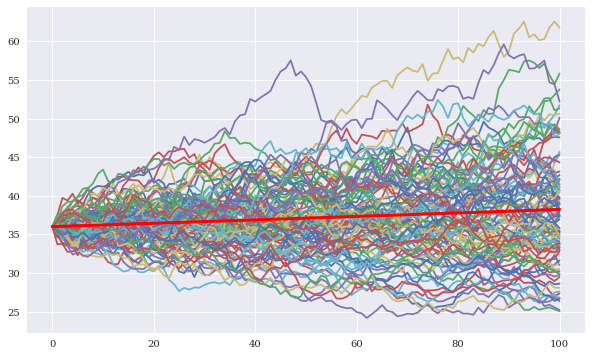

In [21]:
m_grid = np.arange(0, M + 1)
t_grid = T * m_grid / M
exp_val = S0 * np.exp(r * t_grid)


plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['savefig.dpi'] = 300
plt.figure(figsize=(10, 6))
plt.plot(S[:, :100])
# plt.plot(S[:, 10:20]);
plt.plot(m_grid, exp_val, 'r-', linewidth=3);
